In [3]:
#Importing necessary libraries
import pandas as pd                # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt    # Matplotlib for basic plotting
import seaborn as sns              # Seaborn for statistical data visualization
import statistics                  # Statistics module for statistical functions
import plotly.express as px        # Plotly Express for interactive visualizations
import warnings                    # Warnings module to ignore warnings
import plotly.graph_objects as go  # Plotly Graph Objects for more control over visualizations

# Ignore warnings during code execution
warnings.filterwarnings("ignore")

In [4]:
# Loading the CSV file into a DataFrame in Python
data=pd.read_csv('/content/worldpopulationreview.csv')
data

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,"1,436,397,893","1,428,627,663",3.3M,3M,485,0.92%,18.01%,1
1,China,"1,425,436,213","1,425,671,352",9.7M,9.4M,151,-0.03%,17.8%,2
2,United States,"341,075,762","339,996,563",9.4M,9.1M,37,0.53%,4.27%,3
3,Indonesia,"278,883,459","277,534,122",1.9M,1.9M,149,0.82%,3.5%,4
4,Pakistan,"243,270,676","240,485,658",881.9K,770.9K,318,1.96%,3.06%,5
...,...,...,...,...,...,...,...,...,...
229,Montserrat,NaN,"4,386",102,102,43,-0.32%,NaN,230
230,Falkland Islands,NaN,"3,791",12.2K,12.2K,0.31,0.32%,NaN,231
231,Niue,"1,935","1,935",261,261,7,NaN,NaN,232
232,Tokelau,NaN,"1,893",12,10,192,1.16%,NaN,233


In [ ]:
#To view size of rows and columns
data.shape

(234, 9)

In [ ]:
# Getting the dataset column names
data.columns

Index(['Country Name', 'Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank'],
      dtype='object')

In [ ]:
#first five rows of data will be displayed
data.head()

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,"1,436,397,893","1,428,627,663",3.3M,3M,485,0.92%,18.01%,1
1,China,"1,425,436,213","1,425,671,352",9.7M,9.4M,151,-0.03%,17.8%,2
2,United States,"341,075,762","339,996,563",9.4M,9.1M,37,0.53%,4.27%,3
3,Indonesia,"278,883,459","277,534,122",1.9M,1.9M,149,0.82%,3.5%,4
4,Pakistan,"243,270,676","240,485,658",881.9K,770.9K,318,1.96%,3.06%,5


In [28]:
#five rows of data will be displayed randomly
data.sample(5)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
135,Puerto Rico,3266215.0,3260314.0,8900.0,8900.0,369.0,0.0026,0.0004,136
103,Hong Kong,7495387.0,7491609.0,1100.0,1100.0,7140.0,0.0007,0.0009,104
226,Wallis and Futuna,11439.0,11502.0,274.0,274.0,42.0,-0.0055,NaN,227
95,United Arab Emirates,9560806.0,9516871.0,83600.0,71000.0,135.0,0.0079,0.0012,96
215,Liechtenstein,39822.0,39584.0,160.0,160.0,249.0,0.0060,NaN,216


In [5]:
# Data cleaning and type conversion
# Convert percentage strings to floats
def convert_percentage_to_float(percentage_str):
    if pd.isnull(percentage_str):
        return None
    try:
        return float(percentage_str.strip('%')) / 100
    except ValueError:
        return None

# Convert comma-separated strings to floats
def convert_comma_str_to_float(number_str):
   if pd.isnull(number_str):
        return None
   try:
        return float(number_str.replace(',', ''))
   except ValueError:
        return None

# Convert area strings to square kilometers
def convert_area_to_km(area_str):
    if pd.isnull(area_str):
        return None
    try:
        if 'M' in area_str:
            return float(area_str.replace('M', '')) * 1e6
        elif 'K' in area_str:
            return float(area_str.replace('K', '')) * 1e3
        else:
            return float(area_str)  # Assuming already in km² if no unit
    except ValueError:
        return None
data['Population (Jan 2024)'] = data['Population (Jan 2024)'].apply(convert_comma_str_to_float)
data['Population(2023)'] = data['Population(2023)'].apply(convert_comma_str_to_float)
data['Area(km)'] = data ['Area(km)'].apply(convert_area_to_km)
data['Land Area (Km)'] = data['Land Area (Km)'].apply(convert_area_to_km)
data['Density(/Km)'] = data['Density(/Km)'].apply(convert_comma_str_to_float)
data['Growth Rate'] = data['Growth Rate'].apply(convert_percentage_to_float)
data['World%'] = data['World%'].apply(convert_percentage_to_float)
# Visualization 1: Population Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6), dpi=200)

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

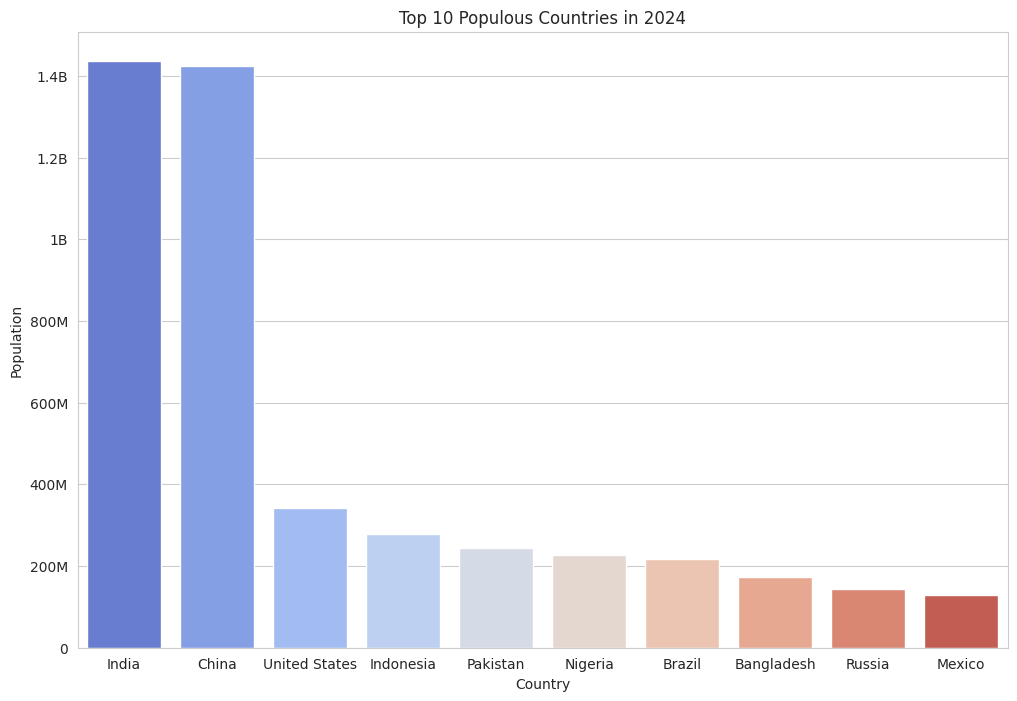

In [24]:
# Sort the DataFrame by population in descending order and select the top 10 populous countries
top_10_populous_countries = data.sort_values(by='Population (Jan 2024)', ascending=False).head(10)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Country Name', y='Population (Jan 2024)', data=top_10_populous_countries, palette='coolwarm')

# Set the title and labels for the plot
plt.title('Top 10 Populous Countries in 2024')
plt.xlabel('Country')
plt.ylabel('Population')

# Set custom y-axis ticks and labels
plt.yticks([0, 2e8, 4e8, 6e8, 8e8, 1e9, 1.2e9, 1.4e9], ['0', '200M', '400M', '600M', '800M', '1B', '1.2B', '1.4B'])

# Display the plot
plt.show()

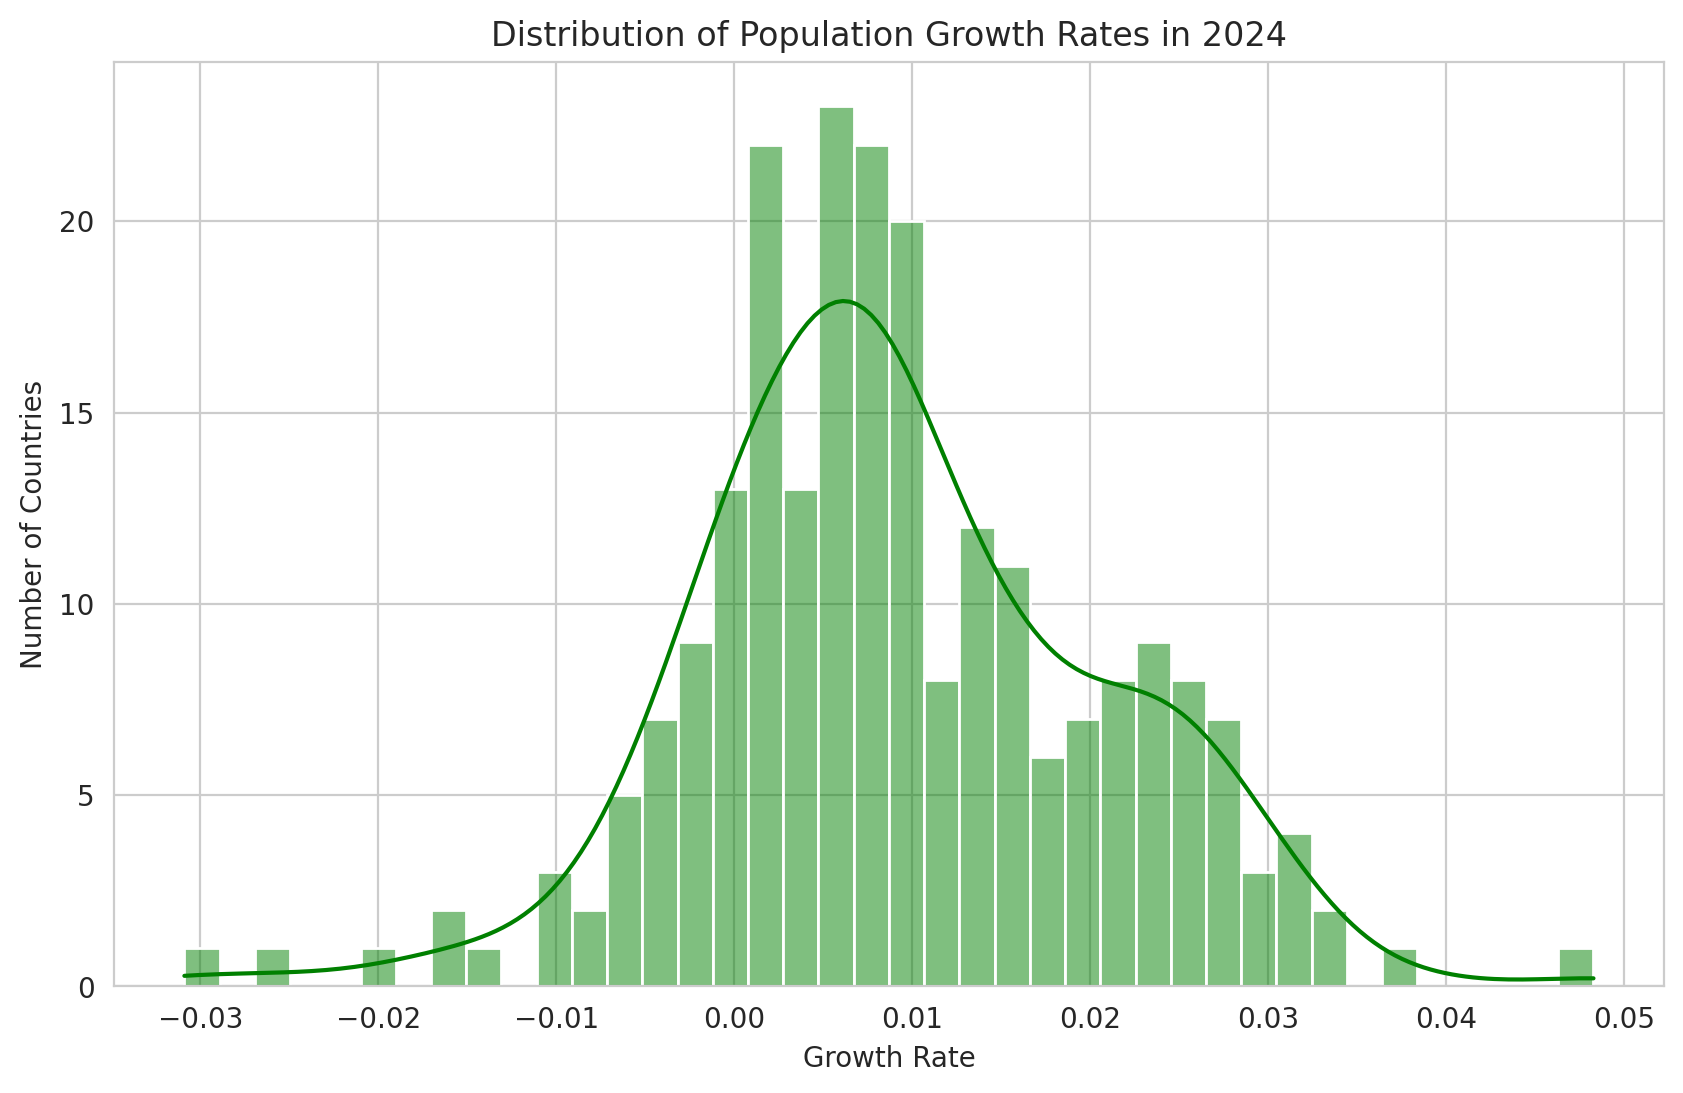

In [25]:
# Set the figure size and DPI (dots per inch)
plt.figure(figsize=(10, 6), dpi=200)

# Create a histogram with a kernel density estimate (KDE) using seaborn
# data['Growth Rate']: Assuming 'data' is a DataFrame, and 'Growth Rate' is a column
# bins=40: Number of bins in the histogram
# color='green': Color of the bars in the histogram
# kde=True: Include a kernel density estimate plot
sns.histplot(data['Growth Rate'], bins=40, color='green', kde=True)

# Set the title of the plot
plt.title('Distribution of Population Growth Rates in 2024')

# Set labels for the x and y axes
plt.xlabel('Growth Rate')
plt.ylabel('Number of Countries')

# Display the plot
plt.show()


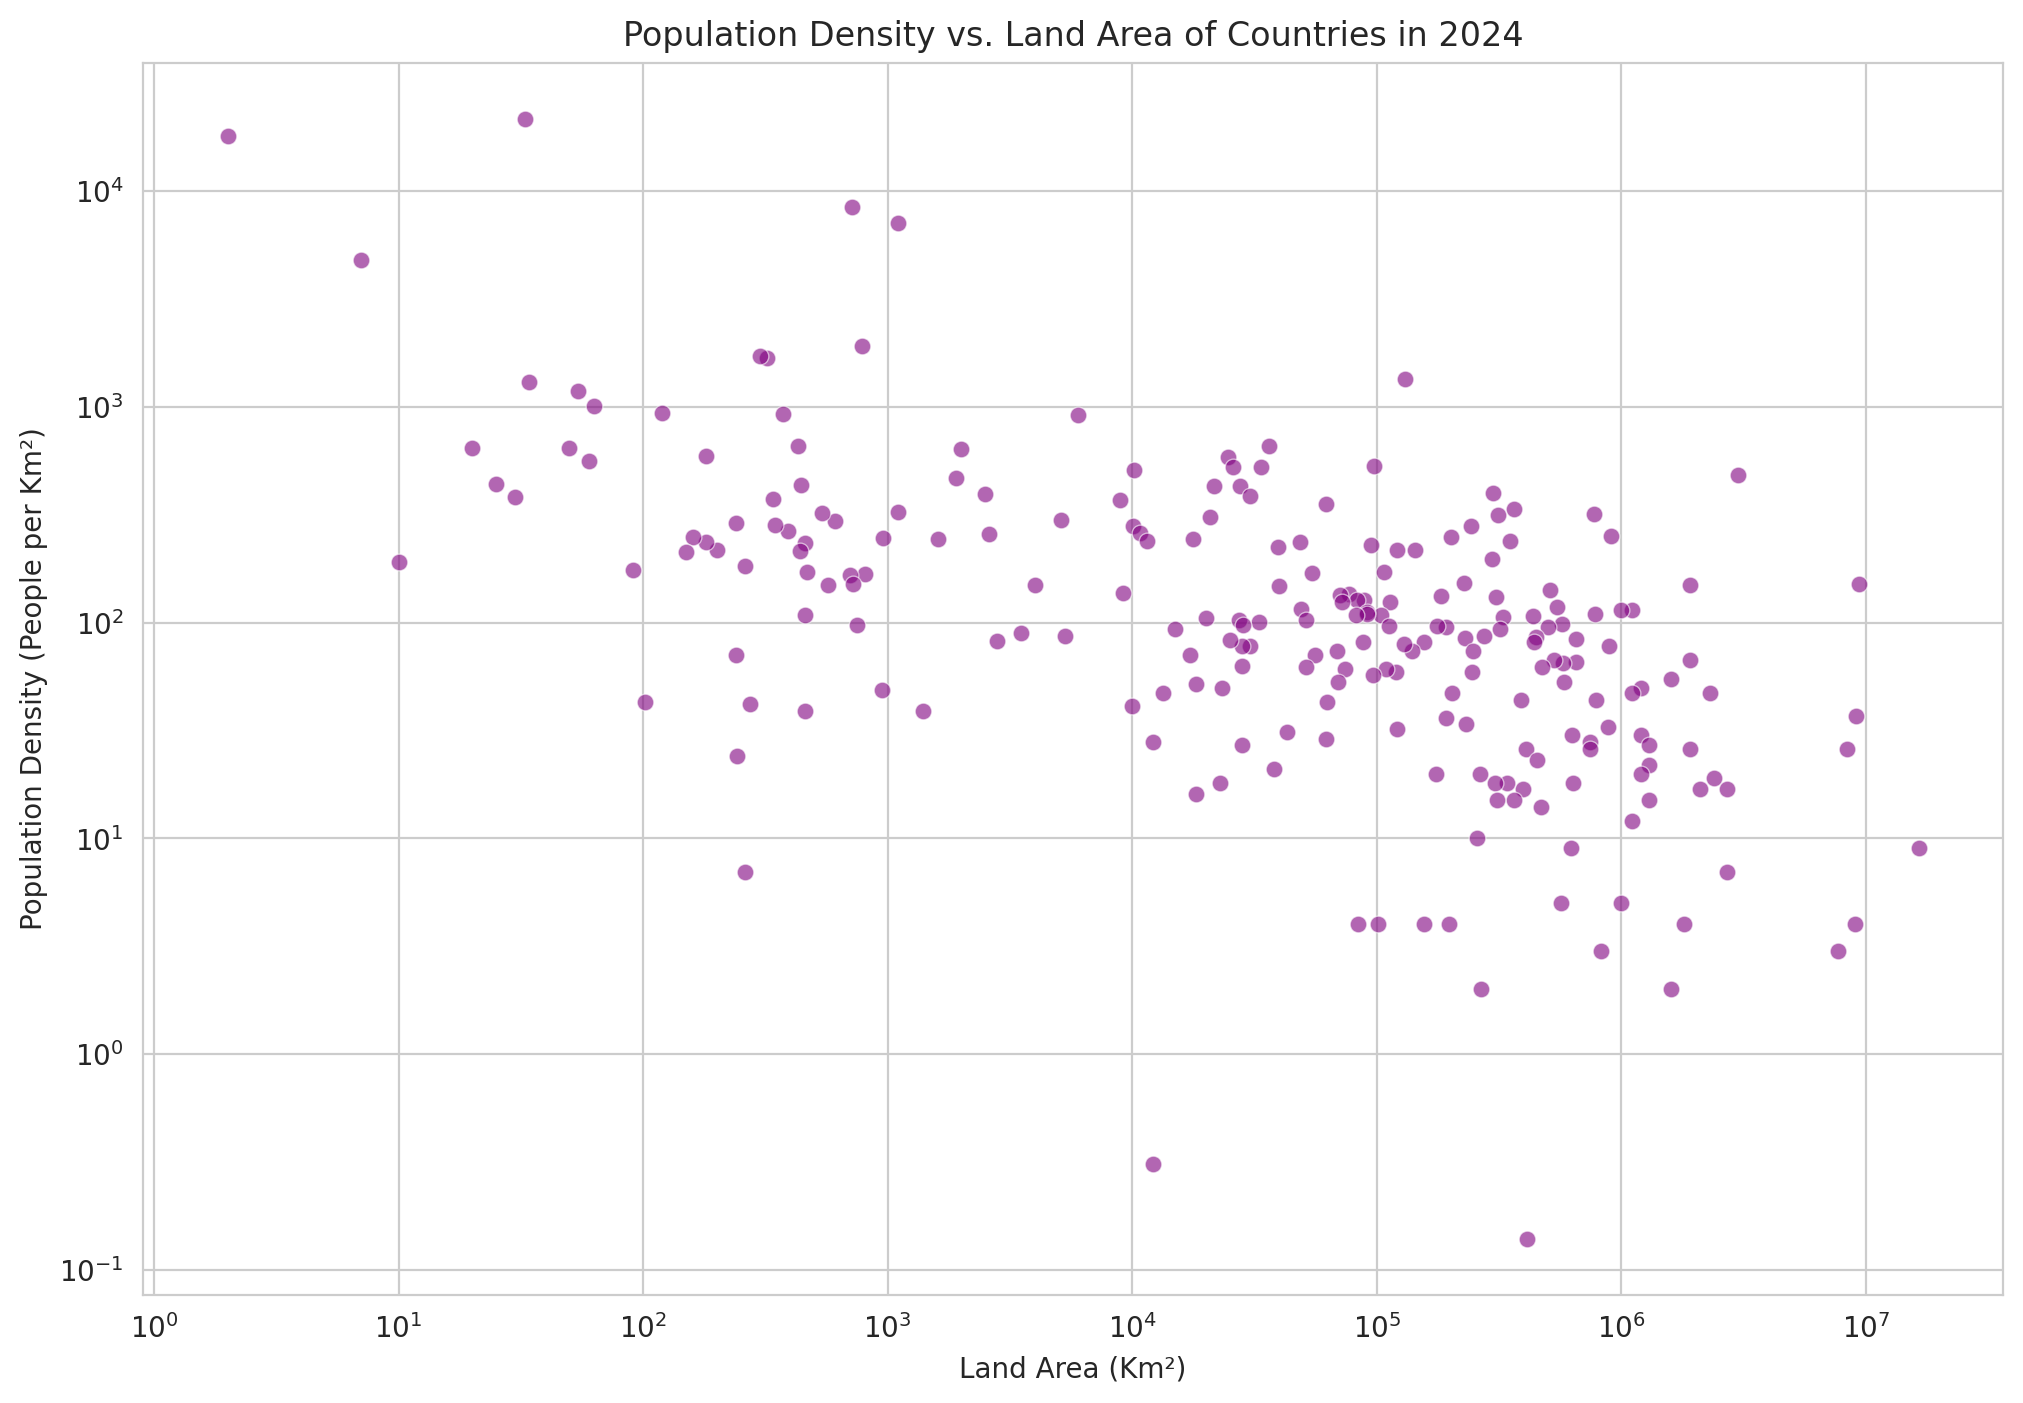

In [26]:
# Set the figure size and DPI (dots per inch)
plt.figure(figsize=(12, 8), dpi=200)

# Create a scatter plot using seaborn
sns.scatterplot(x='Land Area (Km)', y='Density(/Km)', data=data, color='purple', alpha=0.6)

# Set the title of the plot
plt.title('Population Density vs. Land Area of Countries in 2024')

# Set the labels for the x and y axes
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population Density (People per Km²)')

# Set the x and y scales to be logarithmic
plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.show()


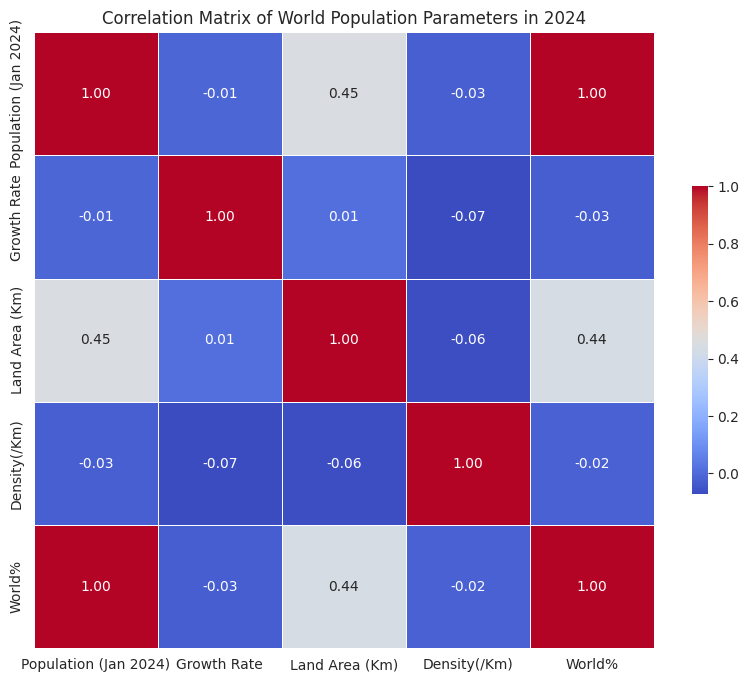

In [14]:
# Selecting relevant numerical columns for the correlation matrix
numerical_cols = ['Population (Jan 2024)', 'Growth Rate', 'Land Area (Km)', 'Density(/Km)', 'World%']
# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of World Population Parameters in 2024')
plt.show()

In [16]:
# Calculate summary statistics for the DataFrame 'df'
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

       Population (Jan 2024)  Population(2023)      Area(km)  Land Area (Km)  \
count           2.240000e+02      2.340000e+02  2.330000e+02    2.330000e+02   
mean            3.609288e+07      3.437442e+07  5.837141e+05    5.597817e+05   
std             1.406560e+08      1.373864e+08  1.765886e+06    1.694453e+06   
min             1.935000e+03      5.180000e+02  2.000000e+00    2.000000e+00   
25%             6.261740e+05      4.225982e+05  2.800000e+03    2.800000e+03   
50%             6.285490e+06      5.643895e+06  8.350000e+04    7.720000e+04   
75%             2.450796e+07      2.324537e+07  4.383000e+05    4.073000e+05   
max             1.436398e+09      1.428628e+09  1.710000e+07    1.640000e+07   

       Density(/Km)  Growth Rate      World%        Rank  
count    234.000000   232.000000  177.000000  234.000000  
mean     453.788248     0.009280    0.005728  117.500000  
std     1990.163274     0.011388    0.019641   67.694165  
min        0.140000    -0.030900    0.00010

In [18]:
def mean_for_columns():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    mean_value = data[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank']
mean_for_columns()



Mean of Population (Jan 2024) : 36092880.491071425
Mean of Population(2023) : 34374424.743589744
Mean of Area(km) : 583714.1115879829
Mean of Land Area (Km) : 559781.6909871245
Mean of Density(/Km) : 453.7882478632479
Mean of Growth Rate : 0.009279741379310345
Mean of World% : 0.005727683615819209
Mean of Rank : 117.5


In [27]:
def median_for_columns():


#Calculating median of the columns, using loop.
#median(): pre-defined module, imported from Statistics library.


  for i in all_columns:
    median_value = data[i].median()
    print("median of", i, ":", median_value)

all_columns = ['Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank']
median_for_columns()

median of Population (Jan 2024) : 6285490.5
median of Population(2023) : 5643895.0
median of Area(km) : 83500.0
median of Land Area (Km) : 77200.0
median of Density(/Km) : 98.5
median of Growth Rate : 0.008
median of World% : 0.0013
median of Rank : 117.5


In [20]:
def standard_deviation_for_columns():

#Calculating standard deviation of the columns, using loop.
#standard_deviation(): pre-defined module, imported from Statistics library.


  for i in all_columns:
    standard_deviation_value = data[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank']
standard_deviation_for_columns()

Standard Deviation of Population (Jan 2024) : 140656026.46403182
Standard Deviation of Population(2023) : 137386405.59726334
Standard Deviation of Area(km) : 1765886.252498202
Standard Deviation of Land Area (Km) : 1694452.5898841727
Standard Deviation of Density(/Km) : 1990.1632743243576
Standard Deviation of Growth Rate : 0.011388050010853874
Standard Deviation of World% : 0.01964104791893441
Standard Deviation of Rank : 67.6941651843052


In [22]:
def skewness_for_columns():


#Calculating skewness of the columns, using loop.
#skew(): pre-defined module, imported from Statistics library.


  for i in all_columns:
    skewness_value = data[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank']
skewness_for_columns()

skewness of Population (Jan 2024) : 8.934692661435541
skewness of Population(2023) : 9.133848385646598
skewness of Area(km) : 6.069618013629302
skewness of Land Area (Km) : 6.056155109977516
skewness of Density(/Km) : 8.742454948493274
skewness of Growth Rate : 0.0853555929397213
skewness of World% : 7.982656034403182
skewness of Rank : 0.0


In [23]:
def kurtosis_for_columns():


#Calculating kurtosis of the columns, using loop.
#kurtosis(): pre-defined module, imported from Statistics library.


  for i in all_columns:
    kurtosis_value = data[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank']
kurtosis_for_columns()


kurtosis of Population (Jan 2024) : 86.26754570794974
kurtosis of Population(2023) : 90.20384967211855
kurtosis of Area(km) : 43.301236491594956
kurtosis of Land Area (Km) : 43.088617207822736
kurtosis of Density(/Km) : 82.77470407574563
kurtosis of Growth Rate : 0.7369059660605961
kurtosis of World% : 68.40836363455678
kurtosis of Rank : -1.2000000000000004
